In [1]:
import os
import sys
sys.path.append('./src')
import pickle
import numpy as np
import matplotlib.pyplot as plt
from src.utils import *
from torchvision import transforms

# Define Your Session

In [2]:
session_path = 'results/0d36e9b5a4a68e1029ccf6a12a69659b' # Define your session path

In [3]:
info_path = os.path.join(session_path, 'info.json')
data_path = json2dict(info_path)['test_data_dir']

print('...loading dataset')
dataset = create_dataset_from_preprocessed(data_path, None)
print('...dataset loading completed')

...loading dataset
...dataset loading completed


# Prediction Visualization

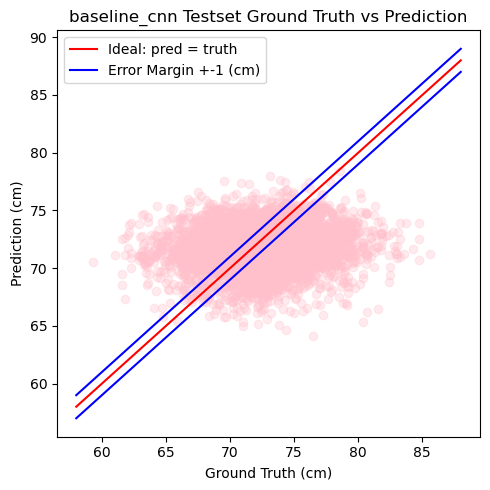

In [4]:
pred_vis(session_path, '', False)

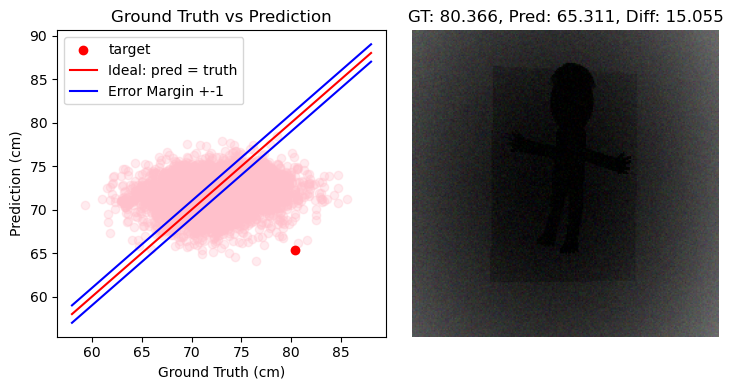

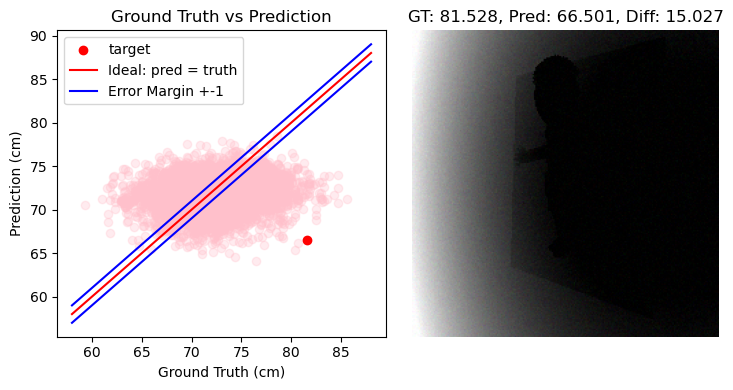

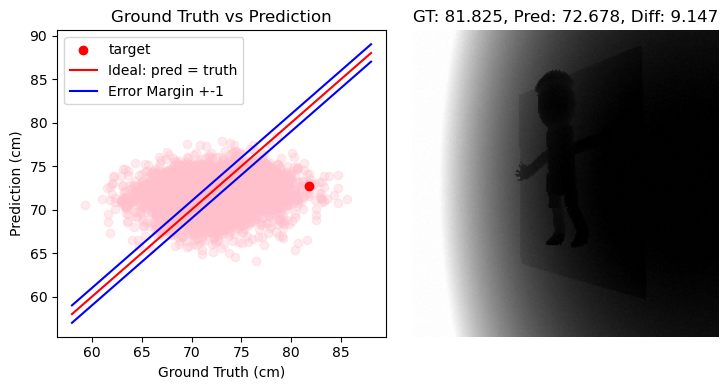

In [6]:
worst_pred(session_path, dataset, [0, 1, 100], 'abs')